In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve

In [8]:
# https://scikit-learn.org/stable/modules/generated/sklearn.calibration.calibration_curve.html#sklearn.calibration.calibration_curve
# https://alexanderdyakonov.wordpress.com/2020/03/27/%D0%BF%D1%80%D0%BE%D0%B1%D0%BB%D0%B5%D0%BC%D0%B0-%D0%BA%D0%B0%D0%BB%D0%B8%D0%B1%D1%80%D0%BE%D0%B2%D0%BA%D0%B8-%D1%83%D0%B2%D0%B5%D1%80%D0%B5%D0%BD%D0%BD%D0%BE%D1%81%D1%82%D0%B8/
# https://github.com/artnitolog/ml_practice/blob/main/2020_fall/mmro/lab_3_linear_models.ipynb


# https://scikit-learn.org/stable/auto_examples/calibration/plot_calibration_curve.html#sphx-glr-auto-examples-calibration-plot-calibration-curve-py
# https://scikit-learn.org/stable/modules/calibration.html

# preds = np.array([0.01, 0.05, 0.12, 0.2, 0.1, 0.2, 0.5, 0.7, 0.9, 0.96, 0.95, 0.99])

bin = 3

y_true = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1])
y_pred = np.array([0.1, 0.2, 0.3, 0.4, 0.65, 0.7, 0.8, 0.9,  1.])

# y_true = np.array([0, 0, 0, 1, 0, 0, 1, 1, 1, 1])
# y_pred = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
proportion, meanprob = calibration_curve(y_true, y_pred, n_bins=bin)
# proportion = The proportion of samples whose class is the positive class, in each bin (y) (y_true)
# meanprob = The mean predicted probability in each bin (x) (y_pred)
proportion, meanprob

(array([0. , 0.5, 1. ]), array([0.2  , 0.525, 0.85 ]))

In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X, y = make_classification(
    n_samples=2000, n_features=20, n_informative=2, n_redundant=10, random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [7]:
def plot_cal_curve(y_test, y_prob, bin, title = ''):
    plt.title(title, fontsize=13)
    plt.grid(True)
    plt.ylabel('Fraction of positives',  fontsize=10)
    plt.xlabel('Mean predicted probability',  fontsize=10)

    proportion, meanprob = calibration_curve(y_test, y_prob, n_bins=bin)
    plt.plot(meanprob, proportion)
    plt.plot([0, 1], [0, 1], linestyle='--')

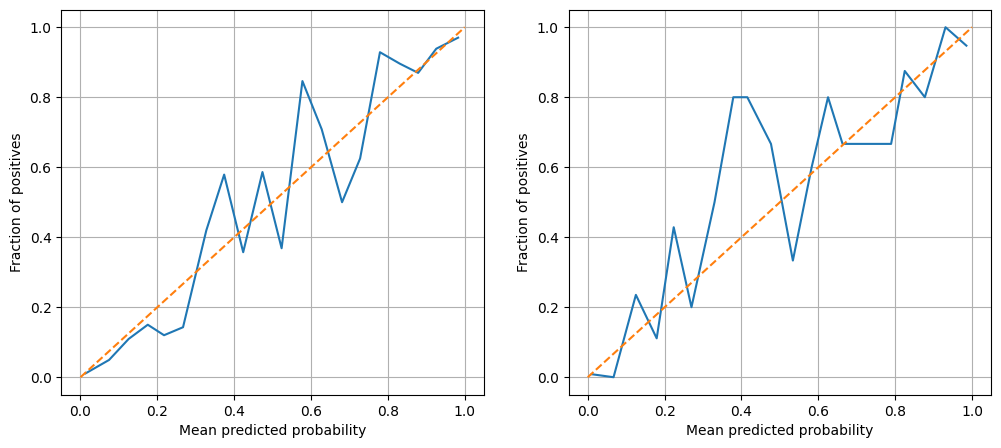

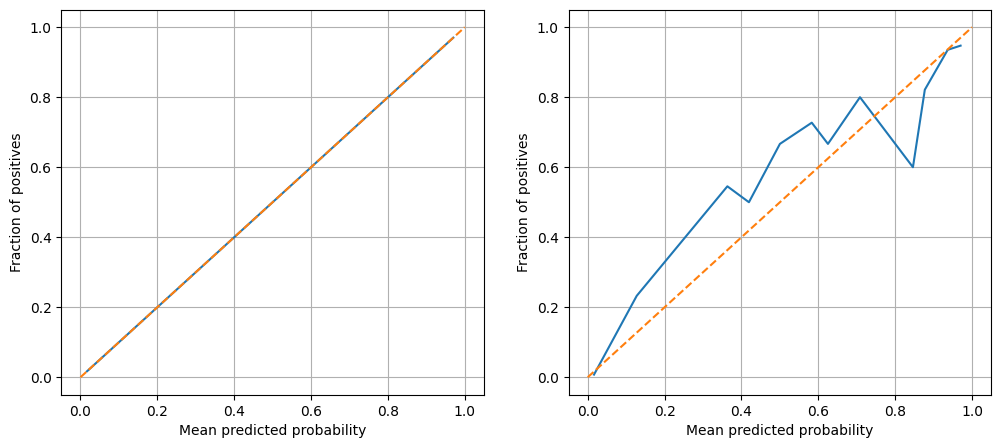

In [13]:
lr = LogisticRegression(C=1.0)
lr.fit(X_train, y_train)
y_prob_train = lr.predict_proba(X_train)[:, 1]
y_prob_test = lr.predict_proba(X_test)[:, 1]

hb = HistogramBinner(20)
hb.fit(y_train, y_prob_train)
y_prob_train_new = hb.transform(y_prob_train)
y_prob_test_new = hb.transform(y_prob_test)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_cal_curve(y_train, y_prob_train, 20)
plt.subplot(1, 2, 2)
plot_cal_curve(y_test, y_prob_test, 20)
plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_cal_curve(y_train, y_prob_train_new, 20)
plt.subplot(1, 2, 2)
plot_cal_curve(y_test, y_prob_test_new, 20)
plt.show()

In [40]:
x1, x2 = np.argsort(y_prob_train[y_train == 1])[:20], np.sort(y_prob_train[y_train == 1])[:20]
y1, y2 = np.argsort(y_prob_train_new[y_train == 1])[:20], np.sort(y_prob_train_new[y_train == 1])[:20]

for i in range(len(x1)):
    print(f"{x1[i]}, {x2[i]:.5}, {y1[i]}, {y2[i]:.5}")

781, 0.0006151, 652, 0.011086
652, 0.0021401, 268, 0.011086
498, 0.0093872, 461, 0.011086
461, 0.018786, 498, 0.011086
268, 0.022883, 781, 0.011086
200, 0.055632, 200, 0.049383
168, 0.089659, 168, 0.049383
513, 0.093796, 750, 0.049383
750, 0.094744, 513, 0.049383
708, 0.10141, 381, 0.10938
279, 0.10308, 70, 0.10938
91, 0.10828, 476, 0.10938
476, 0.12863, 708, 0.10938
70, 0.13379, 671, 0.10938
381, 0.1414, 91, 0.10938
671, 0.14794, 279, 0.10938
761, 0.15168, 441, 0.12
273, 0.15703, 582, 0.12
425, 0.17466, 35, 0.12
648, 0.17724, 676, 0.14286


In [33]:
np.sort(y_prob_train[y_train == 1])[:20]

array([0.0006151 , 0.00214008, 0.00938723, 0.01878638, 0.0228831 ,
       0.05563179, 0.08965901, 0.09379597, 0.0947442 , 0.1014058 ,
       0.10307893, 0.10827638, 0.12863052, 0.13378603, 0.14140383,
       0.14794483, 0.15167593, 0.15703131, 0.1746619 , 0.17723689])

In [34]:
np.sort(y_prob_train_new[y_train == 1])[:20]

array([0.01108647, 0.01108647, 0.01108647, 0.01108647, 0.01108647,
       0.04938272, 0.04938272, 0.04938272, 0.04938272, 0.109375  ,
       0.109375  , 0.109375  , 0.109375  , 0.109375  , 0.109375  ,
       0.109375  , 0.12      , 0.12      , 0.12      , 0.14285714])

In [35]:
np.argsort(y_prob_train_new[y_train == 1])[:20]

array([652, 268, 461, 498, 781, 200, 168, 750, 513, 381,  70, 476, 708,
       671,  91, 279, 441, 582,  35, 676])

In [11]:
class HistogramBinner:
    def __init__(self, n_bins, normalize=True):
        self.bins = np.linspace(0, 1, n_bins + 1)
        self.n_bins = n_bins
        self.thetas = None
        self.normalize = normalize

    def fit(self, y_true, y_conf):
        if self.normalize:
            y_conf = (y_conf - y_conf.min()) / (y_conf.max() - y_conf.min())
        thetas = []
        for l, r in zip(self.bins, self.bins[1:]):
            thetas.append(y_true[(l <= y_conf) & (y_conf <= r)].mean())
        thetas.append(thetas[-1])
        self.thetas = np.array(thetas)
        return thetas

    def transform(self, y_conf):
        if self.normalize:
            y_conf = (y_conf - y_conf.min()) / (y_conf.max() - y_conf.min())
        return self.thetas[np.digitize(y_conf, self.bins) - 1]

In [21]:
# y_prob

In [22]:
# y_train

In [9]:
my_cal(y_true, y_pred, bin)

([0.0, 0.5, 1.0], [0.20000000000000004, 0.525, 0.85])

In [3]:
def my_cal(y_true, y_pred, bin):

    proportion = []
    meanprob = []
    for i in range(bin):
        l = 1.0 / bin * i
        r = 1.0 / bin * (i + 1)
        # print(l, r)
        idx = np.where((y_pred > l) & (y_pred <= r))[0]
        if len(idx):
            meanprob.append(y_pred[idx].mean())
            proportion.append(y_true[idx].mean())

    return proportion, meanprob

[0.16666666666666666, 0.5, 0.8333333333333333] [0.0, 0.5, 1.0]


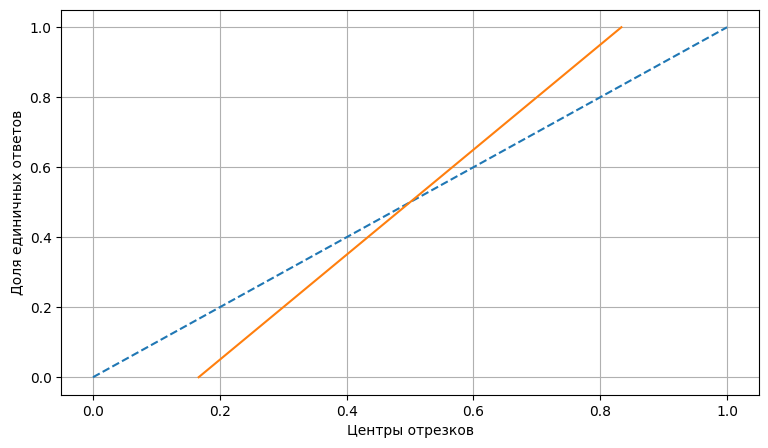

In [10]:
plot_calibration_curve(y_true, y_pred, bin=bin)

In [5]:
def plot_calibration_curve(y_test, preds, bin, title = ''):
    """
    preds --- array of probabilities
    """
    plt.figure(figsize=(9,5))
    plt.title(title, fontsize=13)
    plt.grid(True)
    plt.ylabel('Доля единичных ответов',  fontsize=10)
    plt.xlabel('Центры отрезков',  fontsize=10)
    plt.plot([0, 1], [0, 1], linestyle='--')

    bin_middle_points = []
    bin_real_ratios = []
    n_bins = bin
    for i in range(n_bins):
        l = 1.0 / n_bins * i
        r = 1.0 / n_bins * (i + 1)
        bin_middle_points.append((l + r) / 2)

        bin_real = y_test[(preds >= l) & (preds < r)] == 1
        if len(bin_real) == 0:
            bin_real_ratios.append(0)
        else:
            bin_real_ratios.append(np.mean(bin_real))
    plt.plot(bin_middle_points, bin_real_ratios)
    print(bin_middle_points, bin_real_ratios)